In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [2]:
torch.manual_seed(42)

In [3]:
df=pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


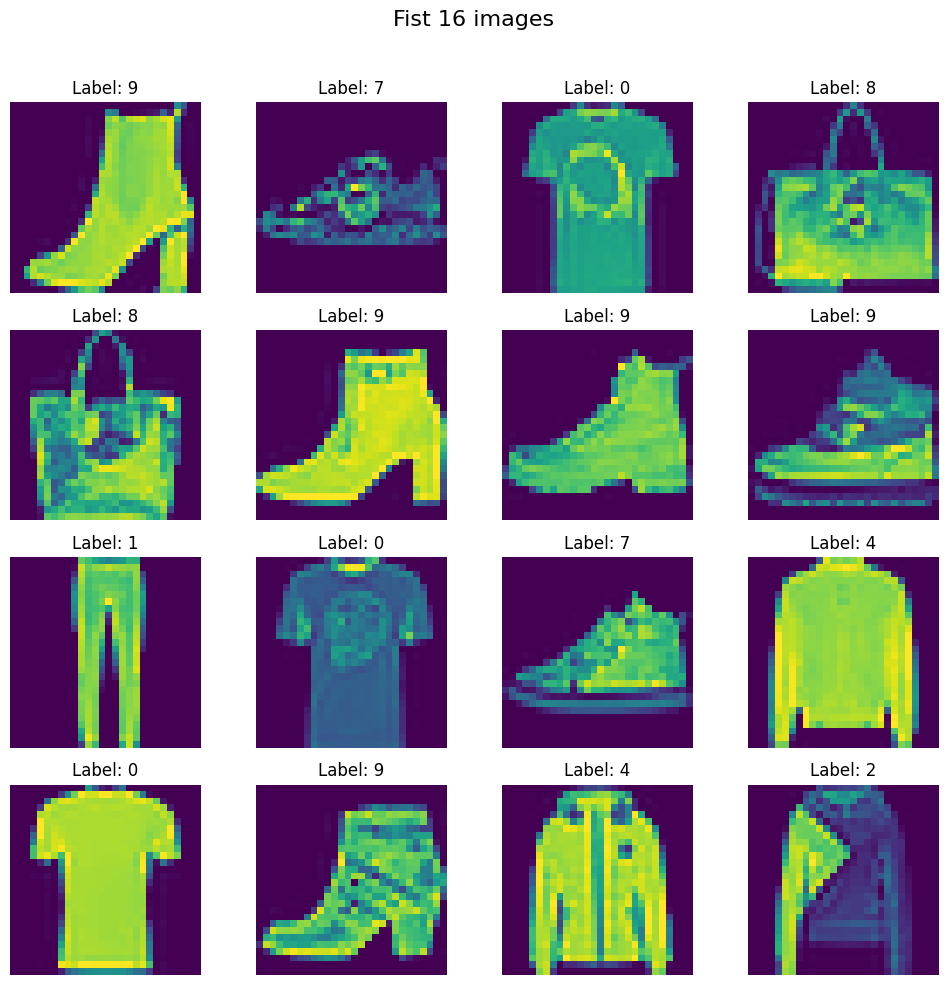

In [4]:
fig,axes=plt.subplots(4,4,figsize=(10,10))
fig.suptitle("Fist 16 images",fontsize=16)

for i,ax in enumerate(axes.flat):
  img=df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"Label: {df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [5]:
x=df.iloc[:,1:].values
y=df.iloc[:,1].values

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [7]:
#scaling the features
x_train=x_train/255.0
x_test=x_test/255.0

In [8]:
#create customdataset class
from torch.utils.data import Dataset,DataLoader

class CustomDataset(Dataset):

  def __init__(self,features,labels):
    self.labels=torch.tensor(labels,dtype=torch.long)
    self.features=torch.tensor(features,dtype=torch.float32)
  def __len__(self):
    return self.features.shape[0]
  def __getitem__(self, index):
    return self.features[index],self.labels[index]

In [9]:
#create train dataset obje
train_dataset=CustomDataset(x_train,y_train)


In [10]:
len(train_dataset)

4800

In [11]:
#create test dataset obj
test_dataset=CustomDataset(x_test,y_test)

In [12]:
#create train and test loader
train_loader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=32,shuffle=False)

In [13]:
from torch.nn.modules.linear import Linear
#define NN class
class MyNN(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)

    )
  def forward(self,x):
    return self.model(x)

In [14]:
#set learning rate and epochs
learning_rate=.1
epochs=100

In [15]:
#instantiate the model
model=MyNN(x_train.shape[1])

#loss function
criterion=nn.CrossEntropyLoss()

#optimizer
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [16]:
#training loop

for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_loader:

    #forward pass
    outputs=model.forward(batch_features)

    #calculate loss
    loss=criterion(outputs,batch_labels)

    #back prop
    optimizer.zero_grad()
    loss.backward()

    #update grad
    optimizer.step()

    total_epoch_loss+=loss.item()

  avg_loss=total_epoch_loss/len(train_loader)
  print(f"epoch : {epoch+1},Loss: {avg_loss}")


epoch : 1,Loss: 0.055890118582368205
epoch : 2,Loss: 0.0009897209239503961
epoch : 3,Loss: 0.0005468806201740032
epoch : 4,Loss: 0.00037644271402844726
epoch : 5,Loss: 0.00028628230019611087
epoch : 6,Loss: 0.00023068827228238812
epoch : 7,Loss: 0.00019284622737347472
epoch : 8,Loss: 0.00016546683858121488
epoch : 9,Loss: 0.00014481178826789194
epoch : 10,Loss: 0.00012865704925360433
epoch : 11,Loss: 0.00011564136936504117
epoch : 12,Loss: 0.0001049871355762851
epoch : 13,Loss: 9.613212127450291e-05
epoch : 14,Loss: 8.859652887316827e-05
epoch : 15,Loss: 8.21445956259422e-05
epoch : 16,Loss: 7.653236050024326e-05
epoch : 17,Loss: 7.161390346131687e-05
epoch : 18,Loss: 6.727151769361228e-05
epoch : 19,Loss: 6.341963321846666e-05
epoch : 20,Loss: 5.996726455096339e-05
epoch : 21,Loss: 5.686606797249046e-05
epoch : 22,Loss: 5.404671456687253e-05
epoch : 23,Loss: 5.149571682813085e-05
epoch : 24,Loss: 4.916010104051812e-05
epoch : 25,Loss: 4.703222935804163e-05
epoch : 26,Loss: 4.505624327

In [17]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [19]:
#evaluation code
total=0
correct =0

with torch.no_grad():
  for batch_features,batch_labels in test_loader:
    outputs=model(batch_features)
    _,predicted=torch.max(outputs,1)
    total+=batch_labels.shape[0]
    correct=correct+(predicted==batch_labels).sum().item()
print(correct/total)


1.0
